In [382]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [383]:
df = pd.read_csv('movies_metadata.csv')
df.head()

/var/folders/6t/6mjcspy10fzf5dhd8gb75g280000gn/T/ipykernel_35123/3991525872.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [384]:
columns = df.columns.tolist()
print("Columns in the dataset:")
print(columns)

Columns in the dataset:
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


The only columns we care about are:
- adult: categorical
- genres: categorical
- original_language: categorical
- budget: numerical
- popularity: numerical
- revenue: numerical
- runtime: numerical
- vote_average: numerical

In [385]:
columns_to_keep = ['adult', 'genres', 'original_language', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average']

df = df[columns_to_keep]
print("\nDataFrame with selected columns:")
df.head()


DataFrame with selected columns:


,adult,genres,original_language,budget,popularity,revenue,runtime,vote_average
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,30000000,21.946943,373554033.0,81.0,7.7
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,65000000,17.015539,262797249.0,104.0,6.9
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,0,11.7129,0.0,101.0,6.5
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,16000000,3.859495,81452156.0,127.0,6.1
4,False,"[{'id': 35, 'name': 'Comedy'}]",en,0,8.387519,76578911.0,106.0,5.7


In [386]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

In [387]:
# Filter out movies where 'budget' is 0
df = df[(df['budget'] != 0) & (df['revenue'] != 0) & (df['runtime'] != 0)]
df.reset_index(drop=True, inplace=True)
df.head(20)

,adult,genres,original_language,budget,popularity,revenue,runtime,vote_average
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,30000000.0,21.946943,373554033.0,81.0,7.7
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,65000000.0,17.015539,262797249.0,104.0,6.9
2,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,16000000.0,3.859495,81452156.0,127.0,6.1
3,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,60000000.0,17.924927,187436818.0,170.0,7.7
4,False,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,35000000.0,5.23158,64350171.0,106.0,5.5
5,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,58000000.0,14.686036,352194034.0,130.0,6.6
6,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,62000000.0,6.318445,107879496.0,106.0,6.5
7,False,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",en,44000000.0,5.092,13681765.0,192.0,7.1
8,False,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,98000000.0,7.284477,10017322.0,119.0,5.7
9,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,52000000.0,10.137389,116112375.0,178.0,7.8


In [388]:
df.shape

(5373, 8)

In [389]:
# filter out movies whose genres is an empty list
df = df[df['genres'].apply(lambda x: isinstance(x, str) and len(ast.literal_eval(x)) > 0)]
df.reset_index(drop=True, inplace=True)
df.shape

(5362, 8)

In [390]:
y = df['revenue'] # we would like to predict revenue, separate it from the df

In [391]:
# Create a copy of the df for encoding
encoded_df = df.copy()

In [392]:
# one hot encode the 'adult' column
encoded_df['adult'] = encoded_df['adult'].apply(lambda x: 1 if x == 'True' else 0)
encoded_df.head()

,adult,genres,original_language,budget,popularity,revenue,runtime,vote_average
0,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,30000000.0,21.946943,373554033.0,81.0,7.7
1,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,65000000.0,17.015539,262797249.0,104.0,6.9
2,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,16000000.0,3.859495,81452156.0,127.0,6.1
3,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,60000000.0,17.924927,187436818.0,170.0,7.7
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,35000000.0,5.23158,64350171.0,106.0,5.5


In [393]:
unique_languages = encoded_df['original_language'].unique()
unique_languages

array(['en', 'fr', 'cn', 'ru', 'es', 'zh', 'sv', 'it', 'de', 'ja', 'fa',
       'pt', 'xx', 'da', 'ko', 'el', 'hi', 'pl', 'af', 'fi', 'th', 'nl',
       'ro', 'vi', 'bm', 'he', 'no', 'ta', 'sr', 'nb', 'ca', 'id',
       '104.0', 'tr', 'ml', 'hu', 'kn', 'is', '68.0', 'te', 'mr', '82.0',
       'ur'], dtype=object)

In [394]:
# get rid of the rows where original_language is '68.0' and '82.0'
encoded_df = encoded_df[~encoded_df['original_language'].isin(['68.0', '82.0', '104.0'])]

In [395]:
unique_languages = encoded_df['original_language'].unique()
unique_languages

array(['en', 'fr', 'cn', 'ru', 'es', 'zh', 'sv', 'it', 'de', 'ja', 'fa',
       'pt', 'xx', 'da', 'ko', 'el', 'hi', 'pl', 'af', 'fi', 'th', 'nl',
       'ro', 'vi', 'bm', 'he', 'no', 'ta', 'sr', 'nb', 'ca', 'id', 'tr',
       'ml', 'hu', 'kn', 'is', 'te', 'mr', 'ur'], dtype=object)

In [396]:
top_languages = encoded_df['original_language'].value_counts().head(5).index
top_languages

Index(['en', 'hi', 'fr', 'ru', 'ja'], dtype='object', name='original_language')

The top 5 languages are English, Hindi, French, Russian, and Japanese.

In [397]:
encoded_df['original_language'] = encoded_df['original_language'].apply(
    lambda x: x if x in top_languages else 'other'
)
# find the number of rows whose original_language is 'Other'
num_other_languages = (encoded_df['original_language'] == 'other').sum()
num_other_languages

np.int64(281)

There are 282 movies whose language is not the top 5 language. Since there are too many languages, we decided to keep the top 5 languages and the rest categorized as "other" for encoding purposes.

In [398]:
# one hot encode original_language column
encoded_df = pd.get_dummies(encoded_df, columns=['original_language'], dtype = int)
encoded_df.head()

,adult,genres,budget,popularity,revenue,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,original_language_other,original_language_ru
0,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,21.946943,373554033.0,81.0,7.7,1,0,0,0,0,0
1,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,17.015539,262797249.0,104.0,6.9,1,0,0,0,0,0
2,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,3.859495,81452156.0,127.0,6.1,1,0,0,0,0,0
3,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,17.924927,187436818.0,170.0,7.7,1,0,0,0,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,5.23158,64350171.0,106.0,5.5,1,0,0,0,0,0


In [399]:
# Convert the string representation of genres to a list of dictionaries
encoded_df['genres'] = encoded_df['genres'].apply(ast.literal_eval)

# get all the unique genres
# Extract just the genre names for each movie
genre_lists = encoded_df['genres'].apply(lambda x: [genre['name'] for genre in x])
genre_lists.head()

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2            [Comedy, Drama, Romance]
3    [Action, Crime, Drama, Thriller]
4       [Action, Adventure, Thriller]
Name: genres, dtype: object

In [400]:
# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the genre lists into a binary matrix
genre_matrix = mlb.fit_transform(genre_lists)

# Create a DataFrame with the binary columns
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Concatenate with the original dataframe
encoded_df = pd.concat([encoded_df.drop('genres', axis=1), genre_df], axis=1)

encoded_df.head()

,adult,budget,popularity,revenue,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,30000000.0,21.946943,373554033.0,81.0,7.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,65000000.0,17.015539,262797249.0,104.0,6.9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16000000.0,3.859495,81452156.0,127.0,6.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,60000000.0,17.924927,187436818.0,170.0,7.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,35000000.0,5.23158,64350171.0,106.0,5.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [401]:
# filter out movies that has NaN values in any of the columns
encoded_df = encoded_df.dropna()
encoded_df.reset_index(drop=True, inplace=True)
encoded_df.shape

(5355, 32)

In [402]:
encoded_df.tail()

,adult,budget,popularity,revenue,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
5350,0.0,2196531.0,0.947509,2411594.0,107.0,5.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5351,0.0,60000000.0,50.903593,71000000.0,95.0,5.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5352,0.0,50000000.0,33.694599,66913939.0,86.0,5.8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5353,0.0,11000000.0,40.796775,184770205.0,111.0,7.4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5354,0.0,12000000.0,1.323587,19000000.0,185.0,6.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [403]:
columns = encoded_df.columns.tolist()
print("\nColumns in the encoded DataFrame:")
print(columns)
print('Number of columns in the encoded DataFrame:', len(columns))


Columns in the encoded DataFrame:
['adult', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'original_language_en', 'original_language_fr', 'original_language_hi', 'original_language_ja', 'original_language_other', 'original_language_ru', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
Number of columns in the encoded DataFrame: 32


In [404]:
# getting the y from the main df before scaling and applying it to the df
y = encoded_df['revenue']

# dropping the y from the main df
encoded_df = encoded_df.drop(['revenue'], axis=1)

# the main df now 
encoded_df

,adult,budget,popularity,runtime,vote_average,original_language_en,original_language_fr,original_language_hi,original_language_ja,original_language_other,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,30000000.0,21.946943,81.0,7.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,65000000.0,17.015539,104.0,6.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16000000.0,3.859495,127.0,6.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,60000000.0,17.924927,170.0,7.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,35000000.0,5.23158,106.0,5.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,0.0,2196531.0,0.947509,107.0,5.6,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5351,0.0,60000000.0,50.903593,95.0,5.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5352,0.0,50000000.0,33.694599,86.0,5.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5353,0.0,11000000.0,40.796775,111.0,7.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [405]:
# removing the adult section due to not enough variety in T and F
encoded_df = encoded_df.drop(['adult'], axis=1)

In [406]:
encoded_df.shape

(5355, 30)

In [407]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(encoded_df)
scaled_X

array([[-0.03055239,  0.87666741, -1.35108598, ..., -0.62464943,
        -0.19900744, -0.13000336],
       [ 0.83988607,  0.5202649 , -0.28117474, ..., -0.62464943,
        -0.19900744, -0.13000336],
       [-0.37872778, -0.43054891,  0.7887365 , ..., -0.62464943,
        -0.19900744, -0.13000336],
       ...,
       [ 0.46684102,  1.72569418, -1.11849658, ..., -0.62464943,
        -0.19900744, -0.13000336],
       [-0.50307613,  2.23898275,  0.04445042, ..., -0.62464943,
        -0.19900744, -0.13000336],
       [-0.47820646, -0.6138241 ,  3.48677353, ..., -0.62464943,
        -0.19900744, -0.13000336]])

In [408]:
Phi = np.hstack((scaled_X, np.ones((scaled_X.shape[0], 1))))

### Features

After realizing that the adult column (T/F) does not have enough variety in T and F, we decided to remove this feature and keep the following features to predict a movie's revenue.

- genres: categorical
- original_language: categorical
- budget: numerical
- popularity: numerical
- revenue: numerical
- runtime: numerical
- vote_average: numerical

# Linear regression 

In [409]:
# changing the y again
y = np.array(y)
y = y.reshape(-1,1)
y

array([[3.73554033e+08],
       [2.62797249e+08],
       [8.14521560e+07],
       ...,
       [6.69139390e+07],
       [1.84770205e+08],
       [1.90000000e+07]])

In [410]:
# initialize weights w
w = np.zeros((Phi.shape[1], 1))

# Learning rate
learning_rate = 0.001

# defining the number of iterations for training
num_iterations = 10000

# storing weights for plotting
weight_history = []

# getting loss history
loss_history = []

# number of samples
num_samples = y.shape[0]

# number of iterations
for i in range(num_iterations):
    # calculate predictions
    predictions = np.dot(Phi, w)

    # calculate loss
    loss = np.mean((predictions - y)**2)

    # appending to loss
    loss_history.append(loss)

    # derivative of loss with respect to predictions
    dloss = 2 * (predictions - y) / num_samples

    # gradient of loss with respect to weights
    gradient = np.dot(Phi.T, dloss)

    # update weights
    w = w - learning_rate * gradient

    # store current weights
    weight_history.append(w.flatten())

    # print the loss every 100 iterations
    if i % 500 == 0:
        print(f"Iteration {i}, Loss: {loss}")


# final weights and predictions
print("Final weights:")
print(w)
gd_pred = np.dot(Phi, w) # acting "function"
print("Final predictions:")
print(gd_pred)

Iteration 0, Loss: 3.5926153876901756e+16
Iteration 500, Loss: 1.343115513493954e+16
Iteration 1000, Loss: 1.1264801242250174e+16
Iteration 1500, Loss: 1.08766212053864e+16
Iteration 2000, Loss: 1.078001579583945e+16
Iteration 2500, Loss: 1.074910012177162e+16
Iteration 3000, Loss: 1.0737549224024384e+16
Iteration 3500, Loss: 1.0732876619900842e+16
Iteration 4000, Loss: 1.0730910087205266e+16
Iteration 4500, Loss: 1.0730064502901508e+16
Iteration 5000, Loss: 1.0729696062501876e+16
Iteration 5500, Loss: 1.072953401704844e+16
Iteration 6000, Loss: 1.0729462221505534e+16
Iteration 6500, Loss: 1.072943021254413e+16
Iteration 7000, Loss: 1.0729415861713998e+16
Iteration 7500, Loss: 1.0729409394272242e+16
Iteration 8000, Loss: 1.0729406465345312e+16
Iteration 8500, Loss: 1.0729405132742814e+16
Iteration 9000, Loss: 1.0729404523746138e+16
Iteration 9500, Loss: 1.0729404244259902e+16
Final weights:
[[ 1.08299372e+08]
 [ 3.51198199e+07]
 [ 3.03966895e+06]
 [ 2.59790856e+07]
 [ 3.29643328e+05]
 

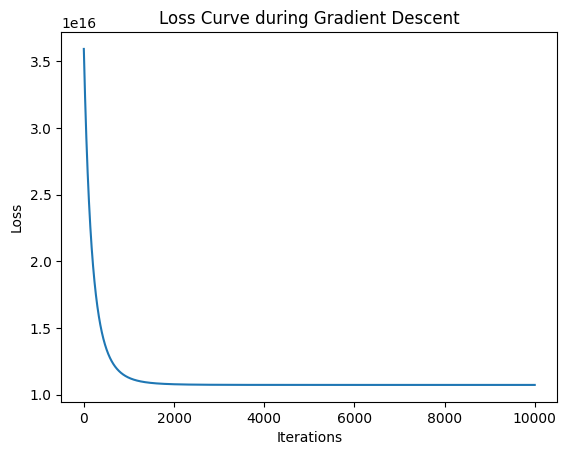

In [411]:
# plotting the loss history
plt.plot(range(num_iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve during Gradient Descent')
plt.show()


The converging curve shows that as the number of iterations increases, the loss decreases, indicating that gradient descent is working.

In [412]:
mse_gd = np.mean((gd_pred - y)**2)
print(f"MSE between gradient descent results and y: {mse_gd}")

rmse_gd = np.sqrt(mse_gd)
print(f"RMSE between gradient descent results and y: {rmse_gd}")

r2_gd = r2_score(y, gd_pred)
print(f"R2 score between gradient descent results and y: {r2_gd}")

MSE between gradient descent results and y: 1.0729404115480834e+16
RMSE between gradient descent results and y: 103582836.9735104
R2 score between gradient descent results and y: 0.6126157952784281


Now let's calculate the closed-form solutions to assess the results from gradient descent.

In [413]:
# doing the multivariate linear regression on the data using the closed-form solution
closed_form = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), np.dot(Phi.T, y))

In [414]:
closed_form_pred = np.dot(Phi, closed_form)

In [415]:
# MSE between closed form and y
mse_closed_form = np.mean((np.dot(Phi, closed_form) - y)**2)
print(f"MSE between closed form results and y: {mse_closed_form}")

rmse_closed_form = np.sqrt(mse_closed_form)
print(f"RMSE between closed form results and y: {rmse_closed_form}")

r2_closed_form = r2_score(y, closed_form_pred)
print(f"R2 score between closed form results and y: {r2_closed_form}")

MSE between closed form results and y: 1.0729406172129714e+16
RMSE between closed form results and y: 103582846.90106617
R2 score between closed form results and y: 0.6126157210232988


As we can see from the results, the gradient descent results are very similar to the closed form results that they have similar MSE (gd: 1.0729404115480834e+16 and cf: 1.0729406172129714e+16), hence similar RMSE, and R2 (gd: 0.6126157952784281 and cf: 0.6126157210232988). This says that GD successfully found an optimal (or very close to optimal) solution to the problem. This suggests proper tuning of hyperparameters like learning rate and number of iterations.

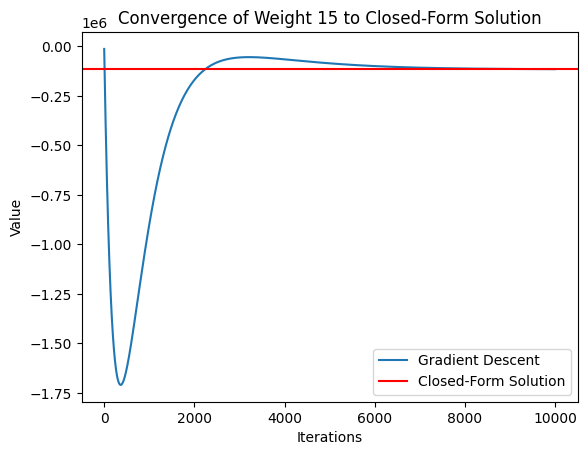

In [416]:
# plot the weight convergence
weight_index = 15
weight_history_specific = [w[weight_index] for w in weight_history]
plt.plot(range(num_iterations), weight_history_specific, label='Gradient Descent')
plt.axhline(y=closed_form[weight_index][0], color='r', label='Closed-Form Solution')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title(f'Convergence of Weight {weight_index} to Closed-Form Solution')
plt.legend()
plt.show()

# Regularized Regression

Ridge Regression Results:
Mean Squared Error: 11653750363587970.00
R2 Score: 0.5848
RMSE: 107952537.55

Lasso Regression Results:
Mean Squared Error: 11653837995039446.00
R2 Score: 0.5848
RMSE: 107952943.43

Top 10 Most Important Features (Ridge):
            Feature    Ridge_Coef
0            budget  1.089954e+08
1        popularity  3.453377e+07
3      vote_average  2.537392e+07
16            Drama -7.096767e+06
21           Horror  5.076784e+06
24          Romance  4.879606e+06
11        Adventure  4.164148e+06
20          History -4.037293e+06
25  Science Fiction -3.994706e+06
27         Thriller -3.982921e+06

Top 10 Most Important Features (Lasso):
            Feature    Lasso_Coef
0            budget  1.090278e+08
1        popularity  3.453380e+07
3      vote_average  2.538271e+07
16            Drama -7.096725e+06
21           Horror  5.081321e+06
24          Romance  4.883008e+06
11        Adventure  4.162110e+06
20          History -4.037663e+06
25  Science Fiction -3.998637e+

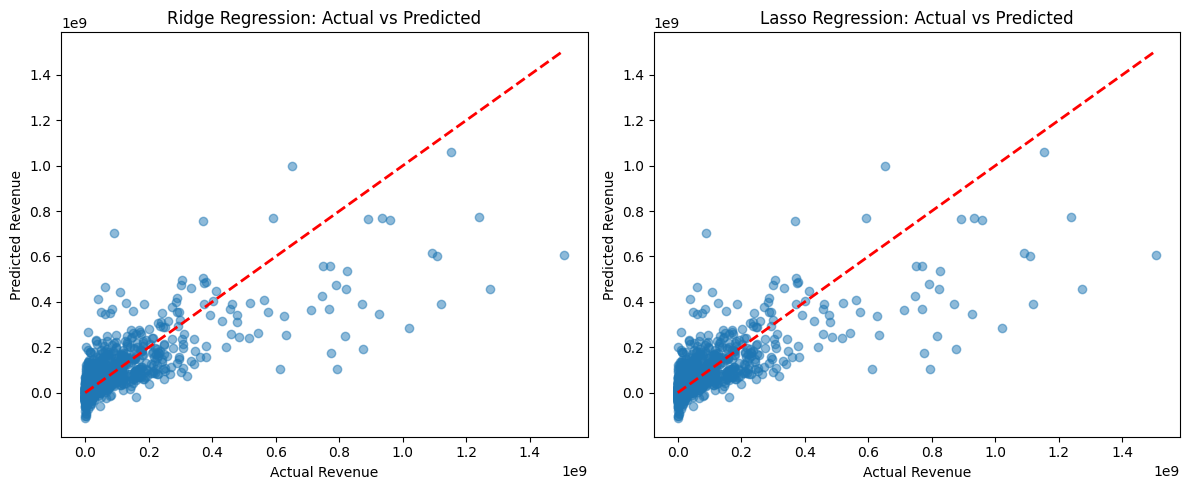


Optimal alpha for Ridge: 81.11308307896873
Optimal alpha for Lasso: 1000.0

Final Model Results with Optimal Alpha:
Ridge Regression:
Mean Squared Error: 11652435347119000.00
R2 Score: 0.5848

Lasso Regression:
Mean Squared Error: 11653866737961646.00
R2 Score: 0.5848


/Users/imanliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [417]:
# Regularized Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_mse:.2f}")
print(f"R2 Score: {ridge_r2:.4f}")
print(f"RMSE: {ridge_rmse:.2f}")

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {lasso_mse:.2f}")
print(f"R2 Score: {lasso_r2:.4f}")
print(f"RMSE: {lasso_rmse:.2f}")
# Compare feature importance
feature_importance = pd.DataFrame({
    'Feature': encoded_df.columns,
    'Ridge_Coef': ridge.coef_.flatten(),
    'Lasso_Coef': lasso.coef_.flatten()
})

# Sort by absolute value of coefficients
feature_importance['Ridge_Abs'] = abs(feature_importance['Ridge_Coef'])
feature_importance['Lasso_Abs'] = abs(feature_importance['Lasso_Coef'])

print("\nTop 10 Most Important Features (Ridge):")
print(feature_importance.nlargest(10, 'Ridge_Abs')[['Feature', 'Ridge_Coef']])

print("\nTop 10 Most Important Features (Lasso):")
print(feature_importance.nlargest(10, 'Lasso_Abs')[['Feature', 'Lasso_Coef']])

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Ridge Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Lasso Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Cross-validation to find optimal alpha
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge CV
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge_cv.fit(X_train, y_train)
print(f"\nOptimal alpha for Ridge: {ridge_cv.alpha_}")

# Lasso CV
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5)
lasso_cv.fit(X_train, y_train)
print(f"Optimal alpha for Lasso: {lasso_cv.alpha_}")

# Final model with optimal alpha
ridge_final = Ridge(alpha=ridge_cv.alpha_)
lasso_final = Lasso(alpha=lasso_cv.alpha_)

ridge_final.fit(X_train, y_train)
lasso_final.fit(X_train, y_train)

ridge_final_pred = ridge_final.predict(X_test)
lasso_final_pred = lasso_final.predict(X_test)

print("\nFinal Model Results with Optimal Alpha:")
print("Ridge Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, ridge_final_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, ridge_final_pred):.4f}")

print("\nLasso Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, lasso_final_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, lasso_final_pred):.4f}")

# Polynomial Regression

Degree 2 - Mean R2 Score: 0.5375 (+/- 0.2597)
Degree 3 - Mean R2 Score: -35.6370 (+/- 140.1622)


/Users/imanliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.08715e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/Users/imanliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.07463e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


Degree 4 - Mean R2 Score: -147067.2566 (+/- 588091.2843)


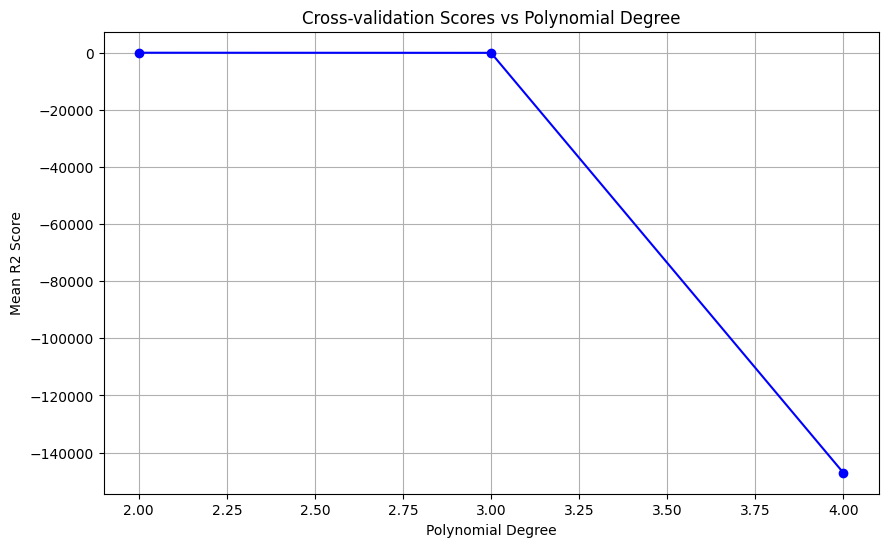


Best polynomial degree: 2

Best Polynomial Model Results:
MSE: 10887797609767586.00
RMSE: 104344609.87
R2 Score: 0.6121


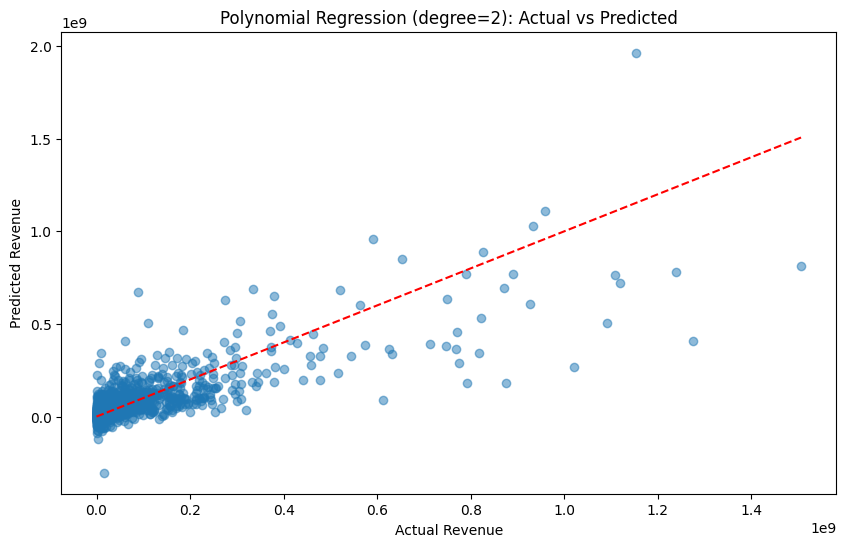


Comparison with Linear Regression:
Linear R2 Score: 0.5848
Polynomial R2 Score: 0.6121


In [418]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Create polynomial features of different degrees
degrees = [2, 3, 4]
cv_scores = []

for degree in degrees:
    # Create polynomial features and fit model
    poly_model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=1.0))
    scores = cross_val_score(poly_model, scaled_X, y, cv=5, scoring='r2')
    cv_scores.append(scores.mean())
    print(f"Degree {degree} - Mean R2 Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, 'bo-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean R2 Score')
plt.title('Cross-validation Scores vs Polynomial Degree')
plt.grid(True)
plt.show()

# Find the best degree
best_degree = degrees[np.argmax(cv_scores)]
print(f"\nBest polynomial degree: {best_degree}")

# Fit the best model
best_model = make_pipeline(PolynomialFeatures(degree=best_degree), Ridge(alpha=1.0))
best_model.fit(X_train, y_train)

# Make predictions
poly_pred = best_model.predict(X_test)

# Calculate metrics
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

# Calculate RMSE
poly_rmse = np.sqrt(poly_mse)

print("\nBest Polynomial Model Results:")
print(f"MSE: {poly_mse:.2f}")
print(f"RMSE: {poly_rmse:.2f}")
print(f"R2 Score: {poly_r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, poly_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Polynomial Regression (degree={best_degree}): Actual vs Predicted')
plt.show()

# Compare with linear regression
print("\nComparison with Linear Regression:")
print(f"Linear R2 Score: {r2_score(y_test, ridge_pred):.4f}")
print(f"Polynomial R2 Score: {poly_r2:.4f}")

# Analysis

Overall, we performed linear regression, regularized regression using Lasso and Ridge, and polynomial regression with degrees 2, 3, and 4.

## Polynomial Regression Results:
The model was tested with polynomial degrees 2, 3, and 4

Degree 2 performed best with:
- Mean R² Score: 0.5375 (+/- 0.2597)
- MSE: 10,887,797,609,767,586.00
- RMSE: 104,344,609.87
- R² Score: 0.6121

However, Higher degrees (3 and 4) performed poorly:
- Degree 3: Mean R² Score: -35.6370 (+/- 140.1622)
- Degree 4: Mean R² Score: -147,067.2566 (+/- 588,091.2843)

## Model Comparison:
The polynomial regression (degree 2) performed better than the linear regression because the polynomial model achieved an R² score of 0.6121, indicating it explains about 61.21% of the variance in the target variable. On the other hand, the linear regression (Ridge) had a lower R² score, suggesting the relationship between features and target is non-linear

# Key Insights
The quadratic relationship (degree 2) captures the non-linear patterns in the data better than linear models. However, higher polynomial degrees (3 and 4) led to overfitting, as evidenced by negative R² scores. The model shows significant variance in performance across different folds (large standard deviation in cross-validation scores)

# Visualization
The notebook includes scatter plots comparing actual vs predicted values of revenues. The red dashed line represents perfect prediction (where actual = predicted). The scatter points show the model's prediction accuracy across different revenue ranges.

# Recommendations
Based on the results, we should use the polynomial regression model with degree 2 for predictions. We could also consider feature engineering or selection to reduce the high RMSE. Moreover, the large standard deviation in cross-validation scores suggests the model's performance varies significantly across different data splits


